<a href="https://colab.research.google.com/github/physteacherlab/qe_data_science/blob/Physics-Data-Analysis/QE_DS_classwork_all_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задачи для самостоятельной работы по анализу данных

В этом разделе 5 задач, которые помогут закрепить навыки загрузки, обработки, анализа и визуализации данных на Python.

Для каждой задачи предусмотрен свой CSV-файл с исходными данными.
Внимательно читайте условия и используйте подсказки к решению.

## Задача 1: Очистка временного ряда с пропусками и выбросами

Дан csv-файл с двумя столбцами: "time" (временные точки) и "value" (значения ряда). Есть пропуски и выбросы.


### Задание:
- Загрузите данные с помощью pandas.
- Обработайте пропуски методом интерполяции по времени.
- Примените медианный фильтр (с окном 3 или 5) для замены выбросов.
- Постройте график до и после очистки.

### Подсказки:
- Используйте `pandas.read_csv`, `df.interpolate(method='time')`.
- Для медианного фильтра — `scipy.signal.medfilt`.
- Для визуализации — `matplotlib.pyplot.plot`.

## Решение задачи 1

1) Загрузка и базовый просмотр данных

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Загрузка данных
df = pd.read_csv('task1_time_series.csv', parse_dates=['time'])

# Установим время как индекс (удобно для интерполяции по времени)
df = df.set_index('time')

print(df.head())
print(df.isna().sum())  # смотрим пропуски

2) Визуализация исходного ряда


In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(df.index, df['value'], label='Исходные данные')
plt.xlabel('time')
plt.ylabel('value')
plt.title('Временной ряд: исходные данные')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

3) Обработка пропусков интерполяцией по времени

In [ ]:
# Интерполяция по времени
df_interp = df.copy()
df_interp['value'] = df_interp['value'].interpolate(method='time')

plt.figure(figsize=(10, 4))
plt.plot(df.index, df['value'], 'o', label='До интерполяции', alpha=0.5)
plt.plot(df_interp.index, df_interp['value'], '-', label='После интерполяции')
plt.xlabel('time')
plt.ylabel('value')
plt.title('Интерполяция пропусков по времени')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

4) Сглаживание выбросов медианным фильтром


In [ ]:
from scipy.signal import medfilt

# Применим медианный фильтр (окно 5 точек)
df_filt = df_interp.copy()
df_filt['value_filt'] = medfilt(df_filt['value'], kernel_size=5)

plt.figure(figsize=(10, 4))
plt.plot(df_interp.index, df_interp['value'], label='После интерполяции', alpha=0.6)
plt.plot(df_filt.index, df_filt['value_filt'], label='После медианного фильтра', linewidth=2)
plt.xlabel('time')
plt.ylabel('value')
plt.title('Сглаживание выбросов медианным фильтром')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

5) Итоговый сравнительный график "до и после"

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(df.index, df['value'], 'o-', label='Исходные данные', alpha=0.5)
plt.plot(df_filt.index, df_filt['value_filt'], '-', label='Очистка: интерполяция + медианный фильтр', linewidth=2)
plt.xlabel('time')
plt.ylabel('value')
plt.title('Ряд до и после очистки')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Задача 2: Сглаживание и НЧ-фильтрация временного сигнала

Дан csv с временным рядом: "time", "signal" — сигнал содержит полезный тренд, гармонический компонент и шум.

### Задание:
- Загрузите данные из csv.
- Выполните скользящее среднее и экспоненциальное сглаживание.
- Посчитайте спектр через БПФ, выделите доминирующую частоту.
- Реализуйте низкочастотный фильтр: обнулите спектр выше выбранного порога и восстановите сигнал.
- Постройте графики: исходный сигнал, оба вида сглаженных сигналов, спектр, отфильтрованный сигнал.

## Решение задачи 2

1) Выполним загрузку данных и первичный просмотр с помощью `pandas`

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('task2_signal.csv', parse_dates=['time'])
df = df.set_index('time')

df.head(), df.describe()

2) Выполним визуализацию исходного сигнала с помощью `matplotlib`

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(df.index, df['signal'], label='Исходный сигнал')
plt.xlabel('time')
plt.ylabel('signal')
plt.title('Исходный временной сигнал')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

3) Выполним сглашивание по методу "скользящее среднее"


In [ ]:
window = 5  # размер окна в точках

df['rolling_mean'] = df['signal'].rolling(window=window, center=True).mean()

plt.figure(figsize=(10, 4))
plt.plot(df.index, df['signal'], label='Исходный сигнал', alpha=0.5)
plt.plot(df.index, df['rolling_mean'], label=f'Скользящее среднее (окно={window})', linewidth=2)
plt.xlabel('time')
plt.ylabel('signal')
plt.title('Скользящее среднее')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

4) Выполним экспоненциальное сглаживание


In [ ]:
alpha = 0.2  # сглаживающий параметр

df['exp_smooth'] = df['signal'].ewm(alpha=alpha, adjust=False).mean()

plt.figure(figsize=(10, 4))
plt.plot(df.index, df['signal'], label='Исходный сигнал', alpha=0.5)
plt.plot(df.index, df['exp_smooth'], label=f'Экспоненциальное сглаживание (alpha={alpha})', linewidth=2)
plt.xlabel('time')
plt.ylabel('signal')
plt.title('Экспоненциальное сглаживание')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

5) Сделаем расчет спектра (БПФ) и поиск доминирующей частоты.
Предположим равномерную дискретизацию по времени. Для частот используем `np.fft.rfftfreq`.

In [ ]:
signal = df['signal'].values
N = len(signal)

# шаг по времени (в секундах или условных единицах)
dt = (df.index[1] - df.index[0]).total_seconds()  # для минут можно оставить так или использовать минуты

# Прямое БПФ
fft_vals = np.fft.rfft(signal)
freqs = np.fft.rfftfreq(N, d=dt)

# Амплитудный спектр
amplitude = np.abs(fft_vals)

plt.figure(figsize=(10, 4))
plt.plot(freqs, amplitude)
plt.xlabel('Частота')
plt.ylabel('Амплитуда')
plt.title('Амплитудный спектр сигнала')
plt.grid(True)
plt.tight_layout()
plt.show()

# Поиск доминирующей частоты (кроме нуля)
dominant_idx = np.argmax(amplitude[1:]) + 1
dominant_freq = freqs[dominant_idx]
print("Доминирующая частота:", dominant_freq)

6) Построим простой низкочастотный фильтр в частотной области. Сделаем «идеальный» НЧ-фильтр: обрежем все частоты выше порога `f_cut`.

In [ ]:
# Задаем частоту среза (например, чуть выше найденной доминирующей)
f_cut = dominant_freq * 1.5

fft_filtered = fft_vals.copy()
fft_filtered[freqs > f_cut] = 0  # зануляем высокие частоты

# Обратное БПФ
signal_filtered = np.fft.irfft(fft_filtered, n=N)

df['signal_filtered'] = signal_filtered

plt.figure(figsize=(10, 4))
plt.plot(df.index, df['signal'], label='Исходный сигнал', alpha=0.4)
plt.plot(df.index, df['signal_filtered'], label='После НЧ-фильтра в БПФ', linewidth=2)
plt.xlabel('time')
plt.ylabel('signal')
plt.title('Сигнал до и после частотной фильтрации')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

7) Сравним все примененные методы сглаживания.

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['signal'], label='Исходный сигнал', alpha=0.3)
plt.plot(df.index, df['rolling_mean'], label='Скользящее среднее', linewidth=2)
plt.plot(df.index, df['exp_smooth'], label='Экспоненциальное сглаживание', linewidth=2)
plt.plot(df.index, df['signal_filtered'], label='НЧ-фильтр (БПФ)', linewidth=2)
plt.xlabel('time')
plt.ylabel('signal')
plt.title('Сравнение методов сглаживания и фильтрации')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Задача 3: Подбор параметров модели и доверительные интервалы

В csv два столбца: "x", "y" — экспериментальные данные, \(y=f(x) + \) шум.

### Задание:
- Загрузите данные.
- Подберите параметры линейной модели двумя способами: формулы МНК и `scipy.optimize.curve_fit`.
- Рассчитайте ковариационную матрицу параметров, стандартные ошибки и 95% доверительные интервалы.
- Постройте график с данными, линией модели и доверительной полосой.

## Решение задачи 3

1) Загрузка данных и первичный анализ

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('task3_model_fit.csv')

print(df.head())
print(df.describe())

x = df['x'].values
y = df['y'].values

plt.figure(figsize=(6, 4))
plt.scatter(x, y, s=20, alpha=0.7, label='Данные')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Экспериментальные данные (x, y)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

2) Составление линейной регрессии по формулам для МНК (ручным способом)

In [ ]:
n = len(x)

Sx = np.sum(x)
Sy = np.sum(y)
Sxx = np.sum(x**2)
Sxy = np.sum(x * y)

a_mnk = (n * Sxy - Sx * Sy) / (n * Sxx - Sx**2)
b_mnk = (Sy - a_mnk * Sx) / n

print(f'Коэффициенты МНК (формулы): a = {a_mnk:.3f}, b = {b_mnk:.3f}')

3) Визуализация результата


In [ ]:
x_line = np.linspace(x.min(), x.max(), 200)
y_line = a_mnk * x_line + b_mnk

plt.figure(figsize=(6, 4))
plt.scatter(x, y, s=20, alpha=0.7, label='Данные')
plt.plot(x_line, y_line, 'r', label='Линейная модель (МНК)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Подгонка линейной модели (ручной МНК)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

4) Использование функции `scipy.optimize.curve_fit`

In [ ]:
from scipy.optimize import curve_fit

def linear_model(x, a, b):
    return a * x + b

params, cov = curve_fit(linear_model, x, y)
a_fit, b_fit = params

print(f'Коэффициенты через curve_fit: a = {a_fit:.3f}, b = {b_fit:.3f}')

5) Добавляем ковариационную матрицу параметров для оценки дисперсии

In [ ]:
sigma_a = np.sqrt(cov[0, 0])
sigma_b = np.sqrt(cov[1, 1])

print(f'Стандартная ошибка a: {sigma_a:.3f}')
print(f'Стандартная ошибка b: {sigma_b:.3f}')

6) Учтем 95% доверительные интервалы параметров. Приближаясь нормальным распределением оценок, для 95% ДИ используем множитель примерно 1.96:

In [ ]:
z = 1.96  # для 95% интервала

a_ci = (a_fit - z * sigma_a, a_fit + z * sigma_a)
b_ci = (b_fit - z * sigma_b, b_fit + z * sigma_b)

print(f'95% ДИ для a: [{a_ci[0]:.3f}, {a_ci[1]:.3f}]')
print(f'95% ДИ для b: [{b_ci[0]:.3f}, {b_ci[1]:.3f}]')

7) Доверительная полоса для предсказаний. Упрощённый подход: построим предсказания и добавим ±2·σ_остатков как «грубую» полосу.

In [ ]:
# Оценка остатков и их стандартного отклонения
y_pred = linear_model(x, a_fit, b_fit)
residuals = y - y_pred
sigma_res = residuals.std(ddof=2)

# Предсказания на сетке x_line
y_pred_line = linear_model(x_line, a_fit, b_fit)

# Грубая полоса: ±2 σ_res
y_upper = y_pred_line + 2 * sigma_res
y_lower = y_pred_line - 2 * sigma_res

plt.figure(figsize=(6, 4))
plt.scatter(x, y, s=20, alpha=0.7, label='Данные')
plt.plot(x_line, y_pred_line, 'r', label='Линейная модель')
plt.fill_between(x_line, y_lower, y_upper, color='r', alpha=0.2, label='~95% доверительная полоса')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Модель и доверительная полоса')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Задача 4: Сравнение моделей и анализ остатков

Даны измерения (x, y), подходит несколько моделей: линейная, полиномиальная (степени 2 или 3), экспоненциальная.

### Задание:
- Загрузите данные.
- Постройте модели — все три типа.
- Вычислите метрики качества: RSS, R^2, AIC, BIC для каждой.
- Постройте графики остатков vs x, гистограммы остатков.
- Проверьте нормальность остатков тестом Шапиро-Уилка.
- Выберите лучшую модель, объясните выбор.

## Решение задачи 4

1) Загрузка данных и первичный просмотр

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('task4_model_comparison.csv')
x = df['x'].values
y = df['y'].values

print(df.head())
print(df.describe())

plt.figure(figsize=(6, 4))
plt.scatter(x, y, s=15, alpha=0.7, label='Данные')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Исходные данные (x, y)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

2) Определение вспомогательных функций для метрик

In [ ]:
from math import log

def rss(y_true, y_pred):
    return np.sum((y_true - y_pred)**2)

def r2_score(y_true, y_pred):
    ss_res = rss(y_true, y_pred)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - ss_res / ss_tot

def aic(y_true, y_pred, k):
    n = len(y_true)
    s = rss(y_true, y_pred)
    return n * np.log(s / n) + 2 * k

def bic(y_true, y_pred, k):
    n = len(y_true)
    s = rss(y_true, y_pred)
    return n * np.log(s / n) + k * np.log(n)

3) Выбор модели 1 - линейная регрессия

In [ ]:
# Линейная регрессия через polyfit
coef_lin = np.polyfit(x, y, deg=1)
p_lin = np.poly1d(coef_lin)

y_lin = p_lin(x)

rss_lin = rss(y, y_lin)
r2_lin = r2_score(y, y_lin)
k_lin = 2  # a, b
aic_lin = aic(y, y_lin, k_lin)
bic_lin = bic(y, y_lin, k_lin)

print("Линейная модель:")
print("  коэффициенты:", coef_lin)
print(f"  RSS = {rss_lin:.2f}, R^2 = {r2_lin:.4f}, AIC = {aic_lin:.2f}, BIC = {bic_lin:.2f}")

4) Выполняем визуализацию результата

In [ ]:
x_plot = np.linspace(x.min(), x.max(), 300)

plt.figure(figsize=(6, 4))
plt.scatter(x, y, s=15, alpha=0.6, label='Данные')
plt.plot(x_plot, p_lin(x_plot), 'r', label='Линейная модель')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Линейная аппроксимация')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

5) Выбор подели 2 - полиномиальная (степень 2)

In [ ]:
deg_poly = 2
coef_poly = np.polyfit(x, y, deg=deg_poly)
p_poly = np.poly1d(coef_poly)

y_poly = p_poly(x)

rss_poly = rss(y, y_poly)
r2_poly = r2_score(y, y_poly)
k_poly = deg_poly + 1  # параметры полинома
aic_poly = aic(y, y_poly, k_poly)
bic_poly = bic(y, y_poly, k_poly)

print(f"Полиномиальная модель степени {deg_poly}:")
print("  коэффициенты:", coef_poly)
print(f"  RSS = {rss_poly:.2f}, R^2 = {r2_poly:.4f}, AIC = {aic_poly:.2f}, BIC = {bic_poly:.2f}")

6) Выполняем визуализацию результата

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(x, y, s=15, alpha=0.6, label='Данные')
plt.plot(x_plot, p_poly(x_plot), 'g', label=f'Полином степени {deg_poly}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Полиномиальная аппроксимация')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

7) Выбор модели 3 - экспоненциальная

In [ ]:
mask = y > 0
x_pos = x[mask]
y_pos = y[mask]

ln_y = np.log(y_pos)

# Линейная регрессия для ln(y) = c0 + c1 * x, где c0 = ln A, c1 = B
coef_exp = np.polyfit(x_pos, ln_y, deg=1)
c1, c0 = coef_exp  # polyfit возвращает [c1, c0] для линейного
B = c1
A = np.exp(c0)

print("Экспоненциальная модель y = A * exp(Bx):")
print(f"  A = {A:.3f}, B = {B:.3f}")

y_exp = A * np.exp(B * x)  # предсказания для всех x

rss_exp = rss(y, y_exp)
r2_exp = r2_score(y, y_exp)
k_exp = 2  # A, B
aic_exp = aic(y, y_exp, k_exp)
bic_exp = bic(y, y_exp, k_exp)

print(f"  RSS = {rss_exp:.2f}, R^2 = {r2_exp:.4f}, AIC = {aic_exp:.2f}, BIC = {bic_exp:.2f}")

8) Визуализация результата

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(x, y, s=15, alpha=0.6, label='Данные')
plt.plot(x_plot, A * np.exp(B * x_plot), 'm', label='Экспоненциальная модель')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Экспоненциальная аппроксимация')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

9) Сводная таблица метрик

In [ ]:
results = pd.DataFrame({
    'model': ['linear', f'poly_{deg_poly}', 'exp'],
    'RSS':   [rss_lin, rss_poly, rss_exp],
    'R2':    [r2_lin, r2_poly, r2_exp],
    'AIC':   [aic_lin, aic_poly, aic_exp],
    'BIC':   [bic_lin, bic_poly, bic_exp]
})

print(results)

10) Анализ остатков и проверка нормальности (напр., для лучшей модели)
Предположим, по AIC/BIC лучшей оказалась, скажем, полиномиальная модель (студент должен сделать выбор по таблице).

In [ ]:
# Остатки для полиномиальной модели
res_poly = y - y_poly

plt.figure(figsize=(6, 4))
plt.scatter(x, res_poly, s=15, alpha=0.7)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('x')
plt.ylabel('residuals')
plt.title('Остатки полиномиальной модели')
plt.grid(True)
plt.tight_layout()
plt.show()

11) Гистограмма остатков

In [ ]:
plt.figure(figsize=(6, 4))
plt.hist(res_poly, bins=20, alpha=0.7, edgecolor='black')
plt.xlabel('residual')
plt.ylabel('count')
plt.title('Гистограмма остатков')
plt.grid(True)
plt.tight_layout()
plt.show()

12) Тест Шапиро-Уилка на нормальность остатков

In [ ]:
from scipy.stats import shapiro

stat, p_value = shapiro(res_poly)
print(f"Тест Шапиро–Уилка: статистика = {stat:.4f}, p-value = {p_value:.4f}")

if p_value > 0.05:
    print("Гипотеза о нормальности остатков НЕ отвергается (остатки совместимы с нормальными).")
else:
    print("Гипотеза о нормальности остатков отвергается (остатки заметно ненормальны).")

13) Интерпретация. По таблице метрик выбрать модель с:

* меньшим RSS (лучше аппроксимирует данные);
* более высоким $R^2$ ;
* минимальными AIC и BIC (баланс точности и числа параметров).​

Проверить, не демонстрируют ли остатки:

* систематический тренд (значит модель неадекватна);
* сильную ненормальность (могут быть выбросы, неверный функциональный вид).

Если нужно, можно добавить ещё одну модель (полином степени 3) и расширить сравнительную таблицу, чтобы студенты увидели эффект «переобучения» по RSS и $R^2$ и роль AIC/BIC.

## Задача 5: Анализ данных физического эксперимента - изучение зависимости периода маятника от длины

В csv данные — измеренная длина "L" маятника и период колебаний "T", с шумом и выбросами.
### Задание:
- Загрузите данные.
- Очистите данные от выбросов с помощью метода интерквартильного размаха (IQR).
- Линеаризуйте модель: \(T^2 = \frac{4 \pi^2}{g} L\).
- Подберите параметры через линейную регрессию, оцените ускорение свободного падения и доверительный интервал.
- Постройте графики: исходные данные T(L), линеаризованный график T^2(L) с линией аппроксимации и теоретической моделью.
- Кратко прокомментируйте влияние очистки данных на оценку g.

## Решение задачи 5

1) Загрузка и визуализация исходных данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('task5_pendulum.csv')

L = df['L'].values
T = df['T'].values

print(df.head())
print(df.describe())

plt.figure(figsize=(8, 5))
plt.scatter(L, T, label='Исходные данные', color='blue', alpha=0.6)
plt.xlabel('Длина маятника L (м)')
plt.ylabel('Период T (с)')
plt.title('Зависимость периода от длины (с выбросами)')
plt.grid(True)
plt.legend()
plt.show()

2) Очистка данных от выбросов (метод IQR для остатков). Простая фильтрация по самим значениям $T$ может быть некорректной, так как $T$ меняется с $L$. П Правильнее оценить грубую модель и фильтровать отклонения от неё, или просто фильтровать «аномально большие» $T$ при малых $L$, если выбросы явные.

Однако, в задании часто подразумевают простой подход: фильтрация по отклонению от медианного тренда. Сделаем так: Вычислим величину $k=\frac{T}{\sqrt{L}} ≈ \frac{2\pi}{\sqrt{g}} = const$. Отфильтруем выбросы именно по этой величине
$k$.

In [ ]:
# Приведенная величина k = T / sqrt(L)
k_vals = T / np.sqrt(L)

# Вычисляем квартили и IQR для k
Q1 = np.percentile(k_vals, 25)
Q3 = np.percentile(k_vals, 75)
IQR = Q3 - Q1

# Границы выбросов (стандартный коэффициент 1.5)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Маска "хороших" данных
mask = (k_vals >= lower_bound) & (k_vals <= upper_bound)

L_clean = L[mask]
T_clean = T[mask]
n_outliers = len(L) - len(L_clean)

print(f"Найдено выбросов: {n_outliers}")
print(f"Нижняя граница k: {lower_bound:.3f}, Верхняя граница k: {upper_bound:.3f}")

# Визуализация очистки
plt.figure(figsize=(8, 5))
plt.scatter(L[~mask], T[~mask], label='Выбросы', color='red', marker='x', s=80)
plt.scatter(L_clean, T_clean, label='Очищенные данные', color='green', alpha=0.6)
plt.xlabel('L (м)')
plt.ylabel('T (с)')
plt.title('Результат фильтрации выбросов')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
x_lin = L_clean
y_lin = T_clean**2

# Линейная регрессия через curve_fit (модель y = a*x + b)
from scipy.optimize import curve_fit

def linear_model(x, a, b):
    return a * x + b

params, cov = curve_fit(linear_model, x_lin, y_lin)
a_fit, b_fit = params

# Ошибки параметров (диагональ ковариационной матрицы)
sigma_a = np.sqrt(cov[0, 0])

print(f"Параметры прямой (T^2 vs L): a = {a_fit:.4f} ± {sigma_a:.4f}, b = {b_fit:.4f}")


In [ ]:
g_est = 4 * np.pi**2 / a_fit
print(f"Оценка ускорения свободного падения g: {g_est:.3f} м/с^2")


In [ ]:
sigma_g = g_est * (sigma_a / a_fit)

# 95% доверительный интервал (z=1.96)
g_lower = g_est - 1.96 * sigma_g
g_upper = g_est + 1.96 * sigma_g

print(f"Стандартная ошибка g: {sigma_g:.3f}")
print(f"95% ДИ для g: [{g_lower:.3f}, {g_upper:.3f}] м/с^2")


In [ ]:
# Теоретическая кривая с найденным g
L_plot = np.linspace(min(L), max(L), 100)
T_model = 2 * np.pi * np.sqrt(L_plot / g_est)

plt.figure(figsize=(8, 5))
# Исходные очищенные данные
plt.scatter(L_clean, T_clean, label='Очищенные данные', color='green', alpha=0.6)
# Исходные выбросы (для наглядности)
plt.scatter(L[~mask], T[~mask], label='Исключенные выбросы', color='red', marker='x', alpha=0.5)
# Модель
plt.plot(L_plot, T_model, 'b-', linewidth=2, label=f'Модель (g={g_est:.2f})')

plt.xlabel('Длина маятника L (м)')
plt.ylabel('Период T (с)')
plt.title(f'Аппроксимация зависимости T(L)\nОценка g = {g_est:.3f} ± {1.96*sigma_g:.3f}')
plt.grid(True)
plt.legend()
plt.show()

Краткий вывод:

Очистка данных методом IQR по приведенной величине позволила исключить грубые выбросы. Линеаризация зависимости дала возможность применить линейную регрессию и получить оценку $g$ с доверительным интервалом. Если бы выбросы не были удалены, метод наименьших квадратов («чувствительный» к выбросам) дал бы сильно смещенную оценку $g$ и завышенную ошибку.

Это решение завершает серию задач и показывает полный цикл обработки экспериментальных данных.

## Задача 6: Радиоактивный распад с учетом фона
**Физика:** Закон радиоактивного распада $N(t) = N_0 e^{-\lambda t}$. В реальности детектор всегда регистрирует еще и постоянный радиационный фон $B$.
Итоговая модель:
$$ y(t) = N_0 e^{-\lambda t} + B $$

**Задание:**
1. Загрузите данные (время $t$, активность $y$).
2. Постройте график $y(t)$. Обратите внимание, что «хвост» данных выходит не в ноль, а на константу (фон).
3. Оцените уровень фона $B$ как среднее значение последних 10-20 точек.
4. Постройте график в координатах $\ln(y - B)$ от $t$. Проверьте, ложатся ли точки на прямую.
5. Используя `scipy.optimize.curve_fit`, выполните подгонку полной модели ($N_0 e^{-\lambda t} + B$) к исходным данным (без ручного вычитания фона).
6. Определите период полураспада $T_{1/2} = \frac{\ln 2}{\lambda}$ и его погрешность.

**Инструменты:** `scipy.optimize.curve_fit`, `plt.yscale('log')`.

## Решение задачи 6

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 1. Загрузка данных
df = pd.read_csv('task6_decay.csv')
t = df['time'].values
y = df['counts'].values

print(df.head())
print(df.describe())

       time  counts
0  0.000000    1097
1  1.010101    1034
2  2.020202     909
3  3.030303     912
4  4.040404     853
             time       counts
count  100.000000   100.000000
mean    50.000000   251.230000
std     29.304537   256.282864
min      0.000000    42.000000
25%     25.000000    74.000000
50%     50.000000   128.500000
75%     75.000000   338.500000
max    100.000000  1097.000000


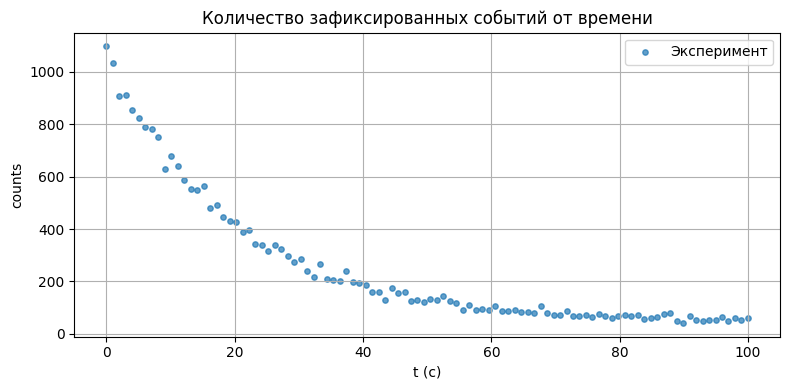

In [7]:
# 2. График исходных данных
plt.figure(figsize=(8, 4))
plt.scatter(t, y, s=15, alpha=0.7, label='Эксперимент')
plt.xlabel('t (с)')
plt.ylabel('counts')
plt.title('Количество зафиксированных событий от времени')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [9]:
# 3. Грубая оценка фона B по "хвосту"
# Возьмем, например, последние 20% точек
tail_frac = 0.2
n_tail = int(len(t) * tail_frac)

t_tail = t[-n_tail:]
y_tail = y[-n_tail:]

B_est = np.mean(y_tail)
B_std = np.std(y_tail, ddof=1)

print(f'Оценка фона B ~ {B_est:.2f} ± {B_std:.2f}')

Оценка фона B ~ 60.25 ± 10.51


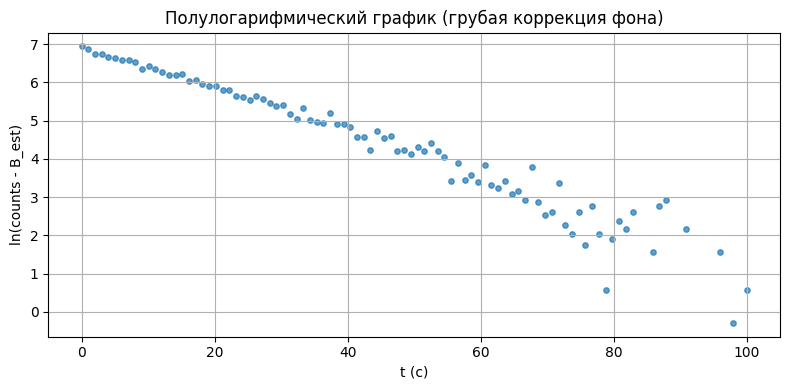

In [20]:
# 4. Полулогарифмический анализ: ln(y - B_est)
# Физически имеет смысл только где y > B_est
mask_pos = y > B_est
t_pos = t[mask_pos]
y_pos = y[mask_pos]

ln_y = np.log(y_pos - B_est)

plt.figure(figsize=(8, 4))
plt.scatter(t_pos, ln_y, s=15, alpha=0.7)
plt.xlabel('t (с)')
plt.ylabel('ln(counts - B_est)')
plt.title('Полулогарифмический график (грубая коррекция фона)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
# 5. Полная нелинейная подгонка модели y = N0 * exp(-lambda * t) + B

def decay_model(t, N0, lambd, B):
    return N0 * np.exp(-lambd * t) + B

# Начальные приближения:
# N0 ~ y(0) - B_est, lambd ~ 0.01–0.1, B ~ B_est
N0_guess = max(y) - B_est
lambda_guess = 0.05
B_guess = B_est

p0 = [N0_guess, lambda_guess, B_guess]

params, cov = curve_fit(decay_model, t, y, p0=p0, maxfev=10000)
N0_fit, lambd_fit, B_fit = params
sigma_N0, sigma_lambd, sigma_B = np.sqrt(np.diag(cov))

print(f'N0 = {N0_fit:.2f} ± {sigma_N0:.2f}')
print(f'lambda = {lambd_fit:.4f} ± {sigma_lambd:.4f}  1/с')
print(f'B = {B_fit:.2f} ± {sigma_B:.2f}')

N0 = 1012.10 ± 7.26
lambda = 0.0504 ± 0.0008  1/с
B = 48.51 ± 3.24


In [13]:
# 6. Период полураспада T1/2 = ln(2)/lambda и его неопределенность
T_half = np.log(2) / lambd_fit
# dT/dλ = -ln(2) / λ^2
sigma_T_half = np.abs(-np.log(2) / (lambd_fit**2)) * sigma_lambd

print(f'T_1/2 = {T_half:.2f} ± {sigma_T_half:.2f} с')

T_1/2 = 13.76 ± 0.21 с


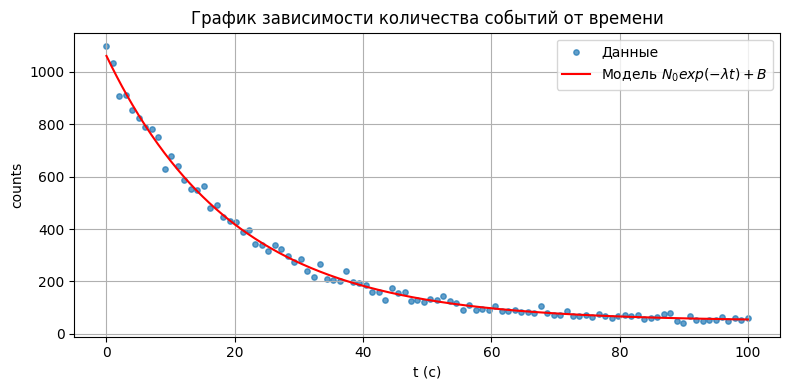

In [19]:
# 7. Визуализация подгонки
t_fit = np.linspace(t.min(), t.max(), 500)
y_fit = decay_model(t_fit, N0_fit, lambd_fit, B_fit)

plt.figure(figsize=(8, 4))
plt.scatter(t, y, s=15, alpha=0.7, label='Данные')
plt.plot(t_fit, y_fit, 'r', label='Модель $N_0 exp(-λt) + B$')
plt.xlabel('t (с)')
plt.ylabel('counts')
plt.title('График зависимости количества событий от времени')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

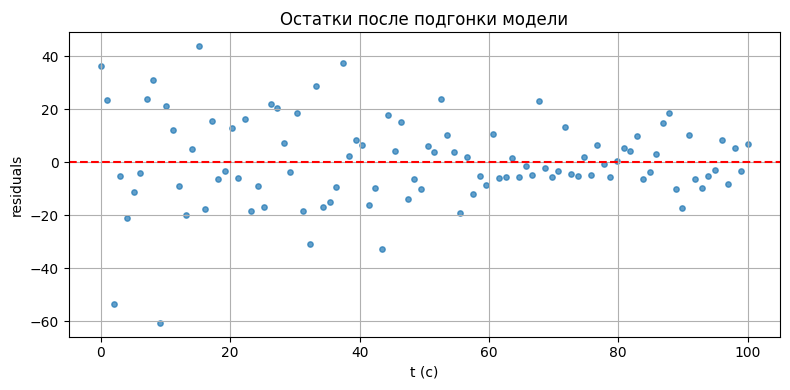

In [15]:
# 8. График остатков
residuals = y - decay_model(t, N0_fit, lambd_fit, B_fit)

plt.figure(figsize=(8, 4))
plt.scatter(t, residuals, s=15, alpha=0.7)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('t (с)')
plt.ylabel('residuals')
plt.title('Остатки после подгонки модели')
plt.grid(True)
plt.tight_layout()
plt.show()

## Задача 7: Резонансная кривая колебательного контура
**Физика:** Амплитудно-частотная характеристика (АЧХ) колебательного контура вблизи резонанса описывается функцией Лоренца:
$$ U(f) = \frac{U_{max}}{\sqrt{1 + Q^2 \left(\frac{f}{f_0} - \frac{f_0}{f}\right)^2}} $$
где $f_0$ — резонансная частота, $Q$ — добротность контура.

**Задание:**
1. Постройте график экспериментальных точек $(f, U)$.
2. Грубо оцените $f_0$ (по положению максимума) и $U_{max}$.
3. Аппроксимируйте данные теоретической формулой, чтобы найти точные значения $f_0$ и $Q$.
4. **Численно** найдите ширину резонанса на полувысоте (FWHM — Full Width at Half Maximum), решив уравнение $U(f) = U_{max}/\sqrt{2}$ относительно $f$ (или найдя ширину по аппроксимированной кривой).

**Инструменты:** Определение сложной функции для `curve_fit`, методы поиска корней (`scipy.optimize.root` или интерполяция).

## Решение задачи 6

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [25]:
# 1. Загрузка данных
df = pd.read_csv('task7_resonance.csv')
f = df['frequency'].values   # частота
U = df['voltage'].values     # напряжение

print(df.head())
print(df.describe())

   frequency   voltage
0  50.000000  0.501648
1  51.010101  0.297347
2  52.020202  0.358979
3  53.030303  0.408643
4  54.040404  0.301662
        frequency     voltage
count  100.000000  100.000000
mean   100.000000    1.474192
std     29.304537    1.220426
min     50.000000    0.246209
25%     75.000000    0.673120
50%    100.000000    0.992784
75%    125.000000    1.889888
max    150.000000    5.166014


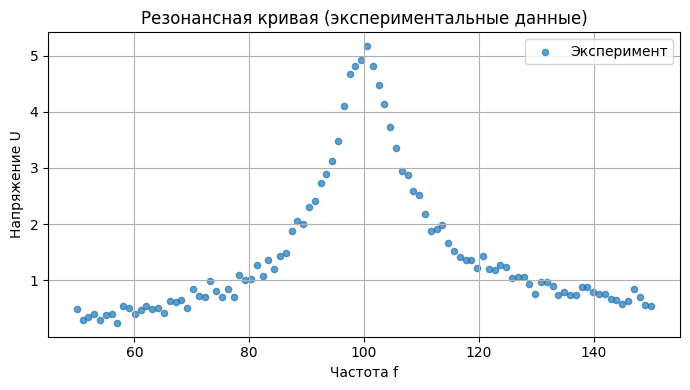

In [24]:
# 2. График экспериментальной АЧХ
plt.figure(figsize=(7, 4))
plt.scatter(f, U, s=20, alpha=0.7, label='Эксперимент')
plt.xlabel('Частота f')
plt.ylabel('Напряжение U')
plt.title('Амплитудно-частотная характеристика колебательного контура')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [26]:
# 3. Грубые оценки f0 и Umax по данным
idx_max = np.argmax(U)
f0_guess = f[idx_max]
Umax_guess = U[idx_max]

print(f'Грубая оценка f0 ≈ {f0_guess:.2f}')
print(f'Грубая оценка Umax ≈ {Umax_guess:.2f}')

# Добротность Q можно взять "на глаз", например 5–20
Q_guess = 10.0

Грубая оценка f0 ≈ 100.51
Грубая оценка Umax ≈ 5.17


In [28]:
# 4. Определяем модель Лоренца

def lorentz_amp(f, Umax, f0, Q):
    term = Q * (f/f0 - f0/f)
    return Umax / np.sqrt(1 + term**2)

p0 = [Umax_guess, f0_guess, Q_guess]

In [29]:
# 5. Нелинейная подгонка модели
params, cov = curve_fit(lorentz_amp, f, U, p0=p0, maxfev=10000)
Umax_fit, f0_fit, Q_fit = params
sigma_Umax, sigma_f0, sigma_Q = np.sqrt(np.diag(cov))

print(f'Umax = {Umax_fit:.3f} ± {sigma_Umax:.3f}')
print(f'f0   = {f0_fit:.3f} ± {sigma_f0:.3f}')
print(f'Q    = {Q_fit:.3f} ± {sigma_Q:.3f}')

Umax = 5.054 ± 0.046
f0   = 100.012 ± 0.072
Q    = 10.208 ± 0.162


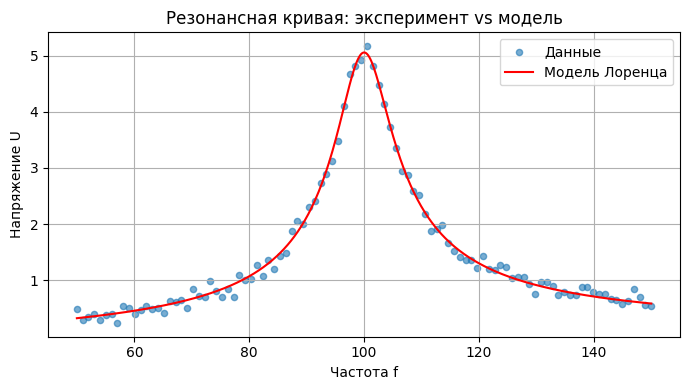

In [30]:
# 6. Визуализация подгонки
f_fit = np.linspace(f.min(), f.max(), 500)
U_fit = lorentz_amp(f_fit, Umax_fit, f0_fit, Q_fit)

plt.figure(figsize=(7, 4))
plt.scatter(f, U, s=20, alpha=0.6, label='Данные')
plt.plot(f_fit, U_fit, 'r', label='Модель Лоренца')
plt.xlabel('Частота f')
plt.ylabel('Напряжение U')
plt.title('Резонансная кривая: эксперимент vs модель')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [31]:
# 7. Поиск ширины резонанса на полувысоте (FWHM)

# Уровень полувысоты:
U_half = Umax_fit / np.sqrt(2)

# Вычислим разность (U_model - U_half) на сетке
diff = U_fit - U_half

# Найдём точки смены знака diff -> вблизи этих f находятся решения U(f) = U_half
sign = np.sign(diff)
sign_change_idx = np.where(np.diff(sign) != 0)[0]

# Ожидаем два пересечения (ниже и выше f0)
f_half_points = []
for idx in sign_change_idx:
    # Линейная интерполяция между точками idx и idx+1
    f1, f2 = f_fit[idx], f_fit[idx+1]
    d1, d2 = diff[idx], diff[idx+1]
    # f* = f1 - d1 * (f2 - f1) / (d2 - d1)
    f_star = f1 - d1 * (f2 - f1) / (d2 - d1)
    f_half_points.append(f_star)

f_half_points = np.array(sorted(f_half_points))

if len(f_half_points) >= 2:
    f_low, f_high = f_half_points[0], f_half_points[-1]
    FWHM = f_high - f_low
    print(f'f_low  ≈ {f_low:.3f}')
    print(f'f_high ≈ {f_high:.3f}')
    print(f'Ширина резонанса (FWHM) ≈ {FWHM:.3f}')
else:
    print("Не удалось корректно найти две точки на полувысоте.")

f_low  ≈ 95.233
f_high ≈ 105.031
Ширина резонанса (FWHM) ≈ 9.798


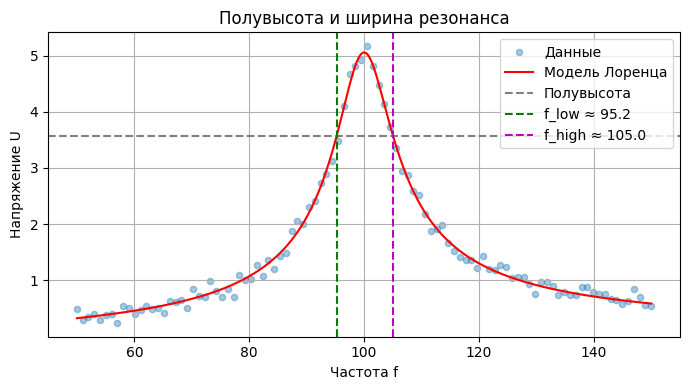

In [32]:
# 8. Визуализация полувысоты и точек FWHM

plt.figure(figsize=(7, 4))
plt.scatter(f, U, s=20, alpha=0.4, label='Данные')
plt.plot(f_fit, U_fit, 'r', label='Модель Лоренца')
plt.axhline(U_half, color='gray', linestyle='--', label='Полувысота')

if len(f_half_points) >= 2:
    plt.axvline(f_low, color='g', linestyle='--', label=f'f_low ≈ {f_low:.1f}')
    plt.axvline(f_high, color='m', linestyle='--', label=f'f_high ≈ {f_high:.1f}')

plt.xlabel('Частота f')
plt.ylabel('Напряжение U')
plt.title('Полувысота и ширина резонанса')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Задача 8: Закон остывания Ньютона (Численное дифференцирование)
**Физика:** Скорость остывания тела пропорциональна разности температур тела и среды:
$$ \frac{dT}{dt} = -k (T - T_{env}) $$

**Задание:**
1. Загрузите данные измерений температуры $T(t)$. Температура среды $T_{env}$ известна.
2. Сгладьте зашумленные данные температуры (например, фильтром Савицкого-Голея), так как прямое дифференцирование шума дает большую погрешность.
3. Вычислите производную $\frac{dT}{dt}$ численно (например, функцией `np.gradient`).
4. Постройте график зависимости скорости остывания $\frac{dT}{dt}$ от разности температур $(T - T_{env})$ — так называемый фазовый портрет.
5. Проверьте линейность этой зависимости и найдите коэффициент остывания $k$ с помощью линейной регрессии.

**Инструменты:** `scipy.signal.savgol_filter`, `np.gradient`, `scipy.stats.linregress`.

## Решение задачи 8

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.stats import linregress

In [34]:
# 1. Загрузка данных
df = pd.read_csv('task8_cooling.csv')
t = df['time'].values
T = df['temp'].values

print(df.head())
print(df.describe())

       time       temp
0  0.000000  90.045602
1  2.013423  88.522652
2  4.026846  85.040720
3  6.040268  83.416619
4  8.053691  81.113791
             time        temp
count  150.000000  150.000000
mean   150.000000   37.075244
std     87.473895   17.367233
min      0.000000   21.582020
25%     75.000000   24.401398
50%    150.000000   29.548886
75%    225.000000   43.578911
max    300.000000   90.045602


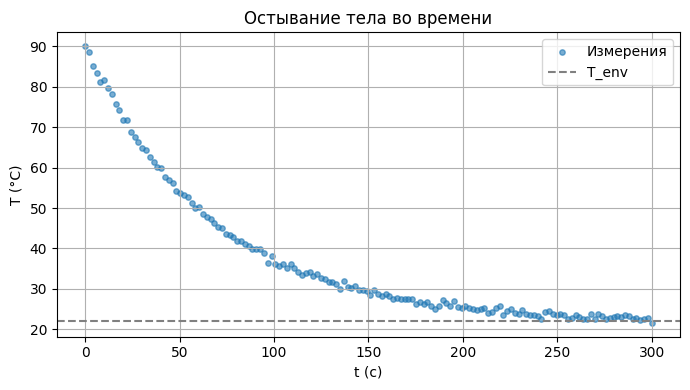

In [35]:
# Известная температура окружающей среды
T_env = 22.0

plt.figure(figsize=(7, 4))
plt.scatter(t, T, s=15, alpha=0.6, label='Измерения')
plt.axhline(T_env, color='gray', linestyle='--', label='T_env')
plt.xlabel('t (с)')
plt.ylabel('T (°C)')
plt.title('Остывание тела во времени')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

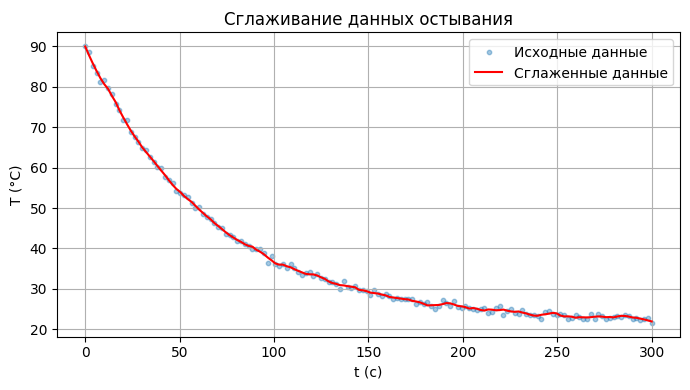

In [37]:
# 2. Сглаживание данных (фильтр Савицкого–Голея)
# Подбираем окно и порядок полинома так, чтобы не "убить" динамику
window =  nine = 9  # должно быть нечётным и < длины массива
polyorder = 2

T_smooth = savgol_filter(T, window_length=window, polyorder=polyorder)

plt.figure(figsize=(7, 4))
plt.scatter(t, T, s=10, alpha=0.4, label='Исходные данные')
plt.plot(t, T_smooth, 'r', label='Сглаженные данные')
plt.xlabel('t (с)')
plt.ylabel('T (°C)')
plt.title('Сглаживание данных остывания')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

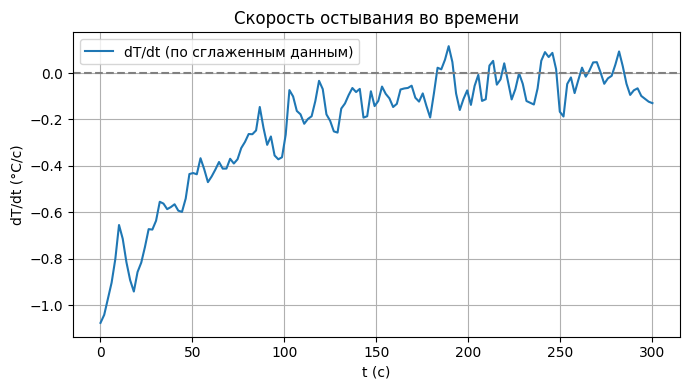

In [38]:
# 3. Численная производная dT/dt по сглаженным данным
dt = np.mean(np.diff(t))  # шаг по времени (почти равномерный)
dTdt = np.gradient(T_smooth, dt)

plt.figure(figsize=(7, 4))
plt.plot(t, dTdt, label='dT/dt (по сглаженным данным)')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('t (с)')
plt.ylabel('dT/dt (°C/с)')
plt.title('Скорость остывания во времени')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

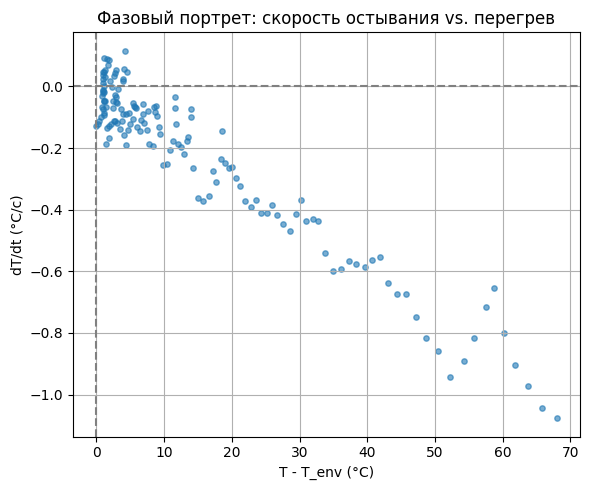

In [39]:
# 4. Фазовый портрет: dT/dt в зависимости от (T - T_env)
deltaT = T_smooth - T_env

plt.figure(figsize=(6, 5))
plt.scatter(deltaT, dTdt, s=15, alpha=0.6)
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel('T - T_env (°C)')
plt.ylabel('dT/dt (°C/с)')
plt.title('Фазовый портрет: скорость остывания vs. перегрев')
plt.grid(True)
plt.tight_layout()
plt.show()

In [40]:
# 5. Линейная регрессия: dT/dt = -k * (T - T_env)
# Уберём точки близко к T_env (малый сигнал и высокий относительный шум)
mask = np.abs(deltaT) > 0.5

slope, intercept, r_value, p_value, std_err = linregress(deltaT[mask], dTdt[mask])

print(f'Результат регрессии: dT/dt ≈ slope * (T - T_env) + intercept')
print(f'slope     = {slope:.5f} °C/с на °C')
print(f'intercept = {intercept:.5f} °C/с')
print(f'R^2       = {r_value**2:.4f}')

# По модели Ньютона: slope ≈ -k
k_est = -slope
sigma_k = std_err  # стандартная ошибка наклона

print(f'Оценка k ≈ {k_est:.5f} 1/с ± {sigma_k:.5f}')

Результат регрессии: dT/dt ≈ slope * (T - T_env) + intercept
slope     = -0.01492 °C/с на °C
intercept = -0.00199 °C/с
R^2       = 0.9319
Оценка k ≈ 0.01492 1/с ± 0.00033


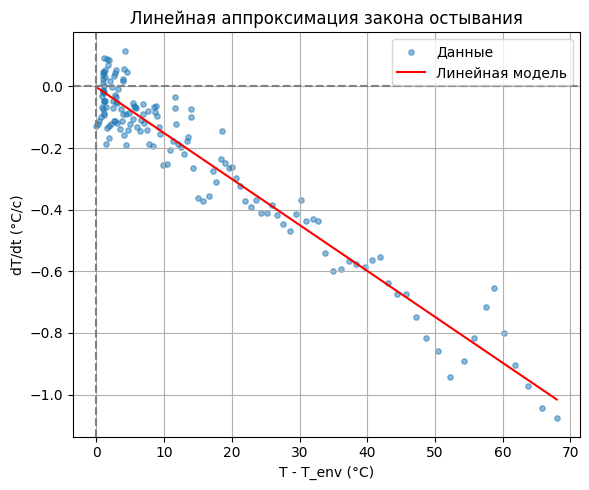

In [41]:
# 6. Визуализация подгонки на фазовом портрете
deltaT_fit = np.linspace(deltaT.min(), deltaT.max(), 200)
dTdt_fit = slope * deltaT_fit + intercept

plt.figure(figsize=(6, 5))
plt.scatter(deltaT, dTdt, s=15, alpha=0.5, label='Данные')
plt.plot(deltaT_fit, dTdt_fit, 'r', label='Линейная модель')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel('T - T_env (°C)')
plt.ylabel('dT/dt (°C/с)')
plt.title('Линейная аппроксимация закона остывания')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Задача 9: Петля магнитного гистерезиса (Численное интегрирование)
**Физика:** Зависимость намагниченности $M$ от внешнего поля $H$ при циклическом перемагничивании образует замкнутую петлю. Площадь внутри петли пропорциональна потерям энергии на гистерезис за один цикл:
$$ W = \oint M \, dH $$

**Задание:**
1. Загрузите данные цикла перемагничивания $(H, M)$.
2. Разделите данные на «верхнюю» (ход поля в одну сторону) и «нижнюю» (ход поля обратно) ветви, если необходимо, или работайте с полным массивом.
3. Визуализировать петлю гистерезиса.
4. Вычислите площадь внутри петли методом численного интегрирования (формула трапеций или Симпсона).
5. *(Дополнительно)* Найдите коэрцитивную силу $H_c$ (пересечение с осью $H$) и остаточную намагниченность $M_r$ (пересечение с осью $M$).

**Инструменты:** `np.trapezoid` (метод трапеций) или `scipy.integrate.simpson`.

## Решение задачи 9

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
# 1. Загрузка данных
df = pd.read_csv('task9_hysteresis.csv')
H = df['H'].values
M = df['M'].values

print(df.head())
print(df.describe())

           H         M
0   0.000000 -1.142369
1   3.156855 -1.036216
2   6.310563 -0.913950
3   9.457981 -0.725001
4  12.595971 -0.538819
                  H           M
count  2.000000e+02  200.000000
mean   0.000000e+00   -0.005178
std    7.071068e+01    1.399063
min   -9.999688e+01   -1.536075
25%   -7.014869e+01   -1.484171
50%   -1.224647e-14   -0.063972
75%    7.014869e+01    1.483134
max    9.999688e+01    1.548232


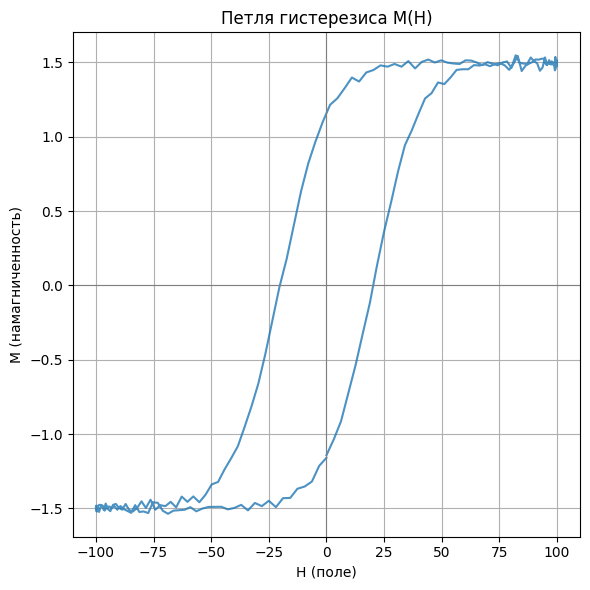

In [45]:
# 2. Визуализация петли гистерезиса
plt.figure(figsize=(6, 6))
plt.plot(H, M, '-', alpha=0.8)
plt.xlabel('H (поле)')
plt.ylabel('M (намагниченность)')
plt.title('Петля гистерезиса M(H)')
plt.grid(True)
plt.axhline(0, color='gray', linewidth=0.8)
plt.axvline(0, color='gray', linewidth=0.8)
plt.tight_layout()
plt.show()

In [51]:
# 3. Площадь петли методом трапеций
# Интеграл по замкнутому контуру ≈ сумма M_i * dH_i по циклу
# Удобный способ: np.trapz(M, H) по каждому обходу.
# Здесь данные уже заданы по одному полному циклу, так что можно сразу интегрировать.

area = np.trapezoid(M, H)  # это приблизительно ∮ M dH
print(f'Оценка площади петли (∮ M dH) ≈ {area:.4f} (в единицах M*H)')

Оценка площади петли (∮ M dH) ≈ -120.5051 (в единицах M*H)


In [52]:
Hc_list = []

for i in range(len(M) - 1):
    if M[i] == 0:
        Hc_list.append(H[i])
    elif M[i] * M[i+1] < 0:
        # Линейная интерполяция между (H[i],M[i]) и (H[i+1],M[i+1])
        H1, H2 = H[i], H[i+1]
        M1, M2 = M[i], M[i+1]
        H_zero = H1 - M1 * (H2 - H1) / (M2 - M1)
        Hc_list.append(H_zero)

print("Оценки коэрцитивного поля H_c (пересечения с M=0):")
for val in Hc_list:
    print(f"  H_c ≈ {val:.3f}")

Оценки коэрцитивного поля H_c (пересечения с M=0):
  H_c ≈ 20.279
  H_c ≈ -20.213


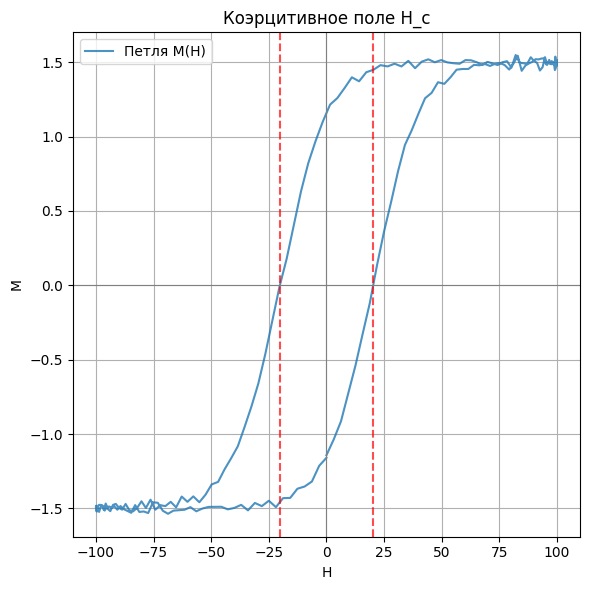

In [53]:
# Визуализация Hc на петле
plt.figure(figsize=(6, 6))
plt.plot(H, M, '-', alpha=0.8, label='Петля M(H)')
for val in Hc_list:
    plt.axvline(val, color='red', linestyle='--', alpha=0.7)
plt.xlabel('H')
plt.ylabel('M')
plt.title('Коэрцитивное поле H_c')
plt.grid(True)
plt.axhline(0, color='gray', linewidth=0.8)
plt.axvline(0, color='gray', linewidth=0.8)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
Mr_list = []

for i in range(len(H) - 1):
    if H[i] == 0:
        Mr_list.append(M[i])
    elif H[i] * H[i+1] < 0:
        # Линейная интерполяция между (H[i],M[i]) и (H[i+1],M[i+1])
        H1, H2 = H[i], H[i+1]
        M1, M2 = M[i], M[i+1]
        M_zeroH = M1 - H1 * (M2 - M1) / (H2 - H1)
        Mr_list.append(M_zeroH)

print("Оценки остаточной намагниченности M_r (пересечения с H=0):")
for val in Mr_list:
    print(f"  M_r ≈ {val:.3f}")

In [ ]:
# Визуализация Mr на петле
plt.figure(figsize=(6, 6))
plt.plot(H, M, '-', alpha=0.8, label='Петля M(H)')
for val in Mr_list:
    plt.axhline(val, color='green', linestyle='--', alpha=0.7)
plt.xlabel('H')
plt.ylabel('M')
plt.title('Остаточная намагниченность M_r')
plt.grid(True)
plt.axhline(0, color='gray', linewidth=0.8)
plt.axvline(0, color='gray', linewidth=0.8)
plt.legend()
plt.tight_layout()
plt.show()

## Задача 10: Поиск сигнала на фоне (Анализ гистограмм)
**Физика:** В спектроскопии часто нужно выделить узкий пик (сигнал) на широком пьедестале (фоне).
Модель спектра:
$$ F(x) = \text{Gaussian}(x, A, \mu, \sigma) + \text{Background}(x, a, b) $$
где фон, например, линейный или экспоненциальный.

**Задание:**
1. Загрузите массив «сырых» данных (энергии частиц). Это не график, а набор чисел.
2. Постройте гистограмму распределения энергий. Подберите оптимальное число бинов.
3. Получите высоты бинов и центры интервалов.
4. Аппроксимируйте гистограмму суммарной моделью (Гаусс + линейный фон).
5. Вычтите найденный фон из гистограммы, оставив только «чистый» пик.
6. Оцените полное число событий в сигнальном пике (как площадь под гауссианой или сумму отсчетов в очищенной гистограмме).

**Инструменты:** `plt.hist` (возвращает значения), составная функция для `curve_fit`.

## Решение задачи 10

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [55]:
# 1. Загрузка данных
df = pd.read_csv('task10_spectrum.csv')
E = df['energy'].values

print(df.head())
print(df.describe())

      energy
0  89.410665
1  73.418845
2  59.886346
3  26.596464
4  24.275067
            energy
count  4851.000000
mean     55.727055
std      23.945615
min       0.447881
25%      40.486753
50%      52.856091
75%      74.584182
max      99.990965


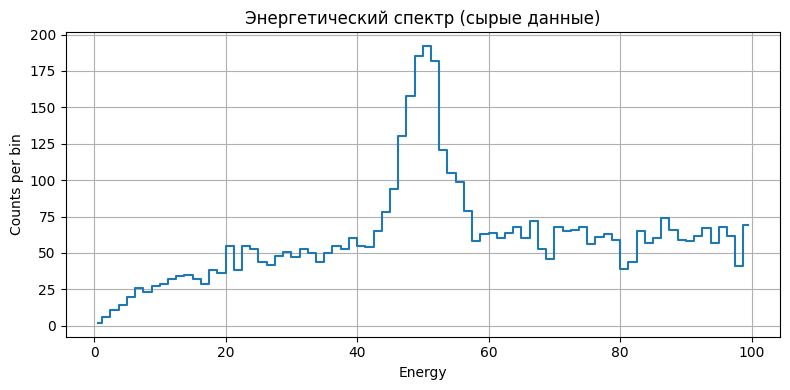

In [56]:
# 2. Гистограмма энергий
bins = 80  # можно варьировать
counts, edges = np.histogram(E, bins=bins, range=(0, 100))
centers = 0.5 * (edges[:-1] + edges[1:])

plt.figure(figsize=(8, 4))
plt.step(centers, counts, where='mid')
plt.xlabel('Energy')
plt.ylabel('Counts per bin')
plt.title('Энергетический спектр (сырые данные)')
plt.grid(True)
plt.tight_layout()
plt.show()

Модель Гаусс + линейный фон


In [58]:
def gauss_plus_linear(E, A, mu, sigma, a, b):
    gauss = A * np.exp(-(E - mu)**2 / (2 * sigma**2))
    background = a * E + b
    return gauss + background

In [59]:
# 4. Начальные приближения параметров
# Грубые оценки: максимум гистограммы ~ пик
idx_max = np.argmax(counts)
mu_guess = centers[idx_max]
A_guess = counts[idx_max]
sigma_guess = 3.0   # ширина пика в генерации ~3
a_guess = 0.0
b_guess = np.median(counts) * 0.5

p0 = [A_guess, mu_guess, sigma_guess, a_guess, b_guess]
print("Начальные приближения:", p0)

Начальные приближения: [np.int64(192), np.float64(50.625), 3.0, 0.0, np.float64(28.5)]


In [60]:
# 5. Нелинейная подгонка
# Фильтруем только бины, где есть хоть какие-то события
mask = counts > 0
cent_fit = centers[mask]
cnt_fit = counts[mask]

params, cov = curve_fit(gauss_plus_linear, cent_fit, cnt_fit, p0=p0, maxfev=10000)
A_fit, mu_fit, sigma_fit, a_fit, b_fit = params
sigma_params = np.sqrt(np.diag(cov))

print(f"A     = {A_fit:.1f} ± {sigma_params[0]:.1f}")
print(f"mu    = {mu_fit:.2f} ± {sigma_params[1]:.2f}")
print(f"sigma = {sigma_fit:.2f} ± {sigma_params[2]:.2f}")
print(f"a     = {a_fit:.4f} ± {sigma_params[3]:.4f}")
print(f"b     = {b_fit:.2f} ± {sigma_params[4]:.2f}")

A     = 137.5 ± 6.0
mu    = 50.18 ± 0.16
sigma = 3.30 ± 0.17
a     = 0.4138 ± 0.0406
b     = 28.58 ± 2.40


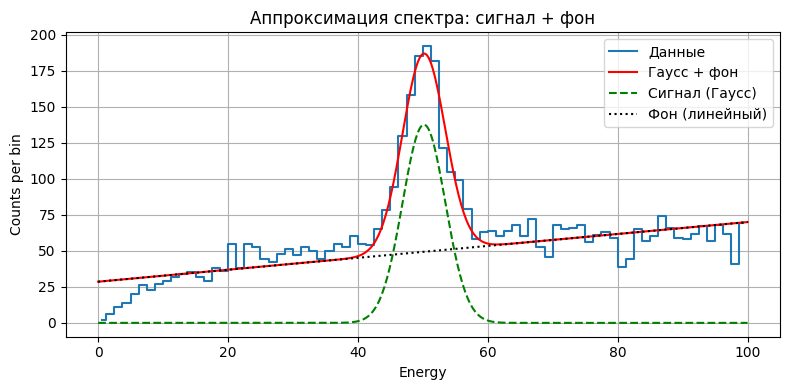

In [63]:
# 6. Визуализация подгонки, гауссовой части и фона
E_plot = np.linspace(0, 100, 500)
total_fit = gauss_plus_linear(E_plot, *params)
gauss_fit = A_fit * np.exp(-(E_plot - mu_fit)**2 / (2 * sigma_fit**2))
bkg_fit = a_fit * E_plot + b_fit

plt.figure(figsize=(8, 4))
plt.step(centers, counts, where='mid', label='Данные')
plt.plot(E_plot, total_fit, 'r', label='Гаусс + фон')
plt.plot(E_plot, gauss_fit, 'g--', label='Сигнал (Гаусс)')
plt.plot(E_plot, bkg_fit, 'k:', label='Фон (линейный)')
plt.xlabel('Energy')
plt.ylabel('Counts per bin')
plt.title('Аппроксимация спектра: сигнал + фон')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [62]:
N_signal = A_fit * sigma_fit * np.sqrt(2 * np.pi)
print(f'Оценка числа событий в пике: N_signal ≈ {N_signal:.1f}')

Оценка числа событий в пике: N_signal ≈ 1136.3
